In [1]:
# Load library
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
df = pd.read_csv("tweets/seattle_tweets.csv", encoding="latin1")
df2 = pd.read_csv("dfs.csv", encoding="latin1")
df3 = pd.DataFrame(df2)

In [3]:
df[0:100]

,name,time,tweet,geo,id,source
0,1030995577981435906,2018-08-19 01:51:15,RT @flyingbikecoop: 3rd Anniversary Party toda...,NaN,1030995577981435906,Twitter for iPhone
1,1030962792415866880,2018-08-18 23:40:58,Mystery keg #1 is tapped! Pitchfork is our wil...,"{'type': 'Point', 'coordinates': [47.69208753,...",1030962792415866880,Instagram
2,1030958589467406337,2018-08-18 23:24:16,3 years old!! #proudmemberowner - Drinking a S...,"{'type': 'Point', 'coordinates': [47.6921, -12...",1030958589467406337,Untappd
3,1030953374148165633,2018-08-18 23:03:33,#MemberDrivenBeer celebrating 3 years! - Drink...,NaN,1030953374148165633,Untappd
4,1030944029788332032,2018-08-18 22:26:25,#MemberDrivenBeer Stout Float :-D - Drinking a...,NaN,1030944029788332032,Untappd
5,1030943879732899840,2018-08-18 22:25:49,See you soon for our Third Birthday Party! \n4...,"{'type': 'Point', 'coordinates': [47.69208753,...",1030943879732899840,Instagram
6,1030927628293873664,2018-08-18 21:21:14,#MemberDrivenBeer 3rd Anniversary - Drinking a...,NaN,1030927628293873664,Untappd
7,1030923065188708352,2018-08-18 21:03:07,3rd Anniversary Party today! Bring all your fr...,NaN,1030923065188708352,Twitter for iPhone
8,1030520154109698048,2018-08-17 18:22:05,Updated Beer List! Come have some fun with us ...,"{'type': 'Point', 'coordinates': [47.69208753,...",1030520154109698048,Instagram
9,1030504376903688192,2018-08-17 17:19:23,Come have some fun with us tonight and enjoy t...,"{'type': 'Point', 'coordinates': [47.69208753,...",1030504376903688192,Instagram


In [4]:
df2.head()

,id,address,categories,city,country,latitude,longitude,name,twitter,websites,no_twitter,no_website,no_menu,state,clusters,cluster_name,zipcode
0,AV1TrojULD2H7whiaK47,1875 S. Pearl St,"restaurant,pubs,brewery",Denver,US,39.682568,-104.98078,Denver pearl brewing,NaN,NaN,True,True,True,CO,3,den,80210
1,AV5NZZTxa4HuVbedB2d_,Denver International Airport,"restaurant,american,pizza,pubs,brewery",Denver,US,39.739580,-104.98731,Rock Bottom Restaurant & Brewery,NaN,NaN,True,True,True,CO,3,den,80202
2,AV1TquITLD2H7whiaGIE,1477 Monroe Street,"restaurant,brewery",Denver,US,39.739752,-104.94508,Cerebral Brewing,NaN,http://cerebralbrewing.com/,True,False,True,CO,3,den,80206
3,AV492ksaIxWefVJwlWqA,Denver International Airport,"restaurant,american,pizza,pubs,brewery",Denver,US,39.739580,-104.98731,Rock Bottom Restaurant & Brewery,NaN,NaN,True,True,True,CO,3,den,80202
4,AV49C3vO3-Khe5l_Sx5V,1875 S. Pearl St,"restaurant,pubs,brewery",Denver,US,39.682568,-104.98078,Denver pearl brewing,NaN,NaN,True,True,True,CO,3,den,80210


In [5]:
#re.sub("[^a-zA-Z]+", "", "I love python 1254")

In [6]:
tw_len = df.tweet.str.len()
tw_len.head()

0    107
1    145
2    130
3    134
4    133
Name: tweet, dtype: int64

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


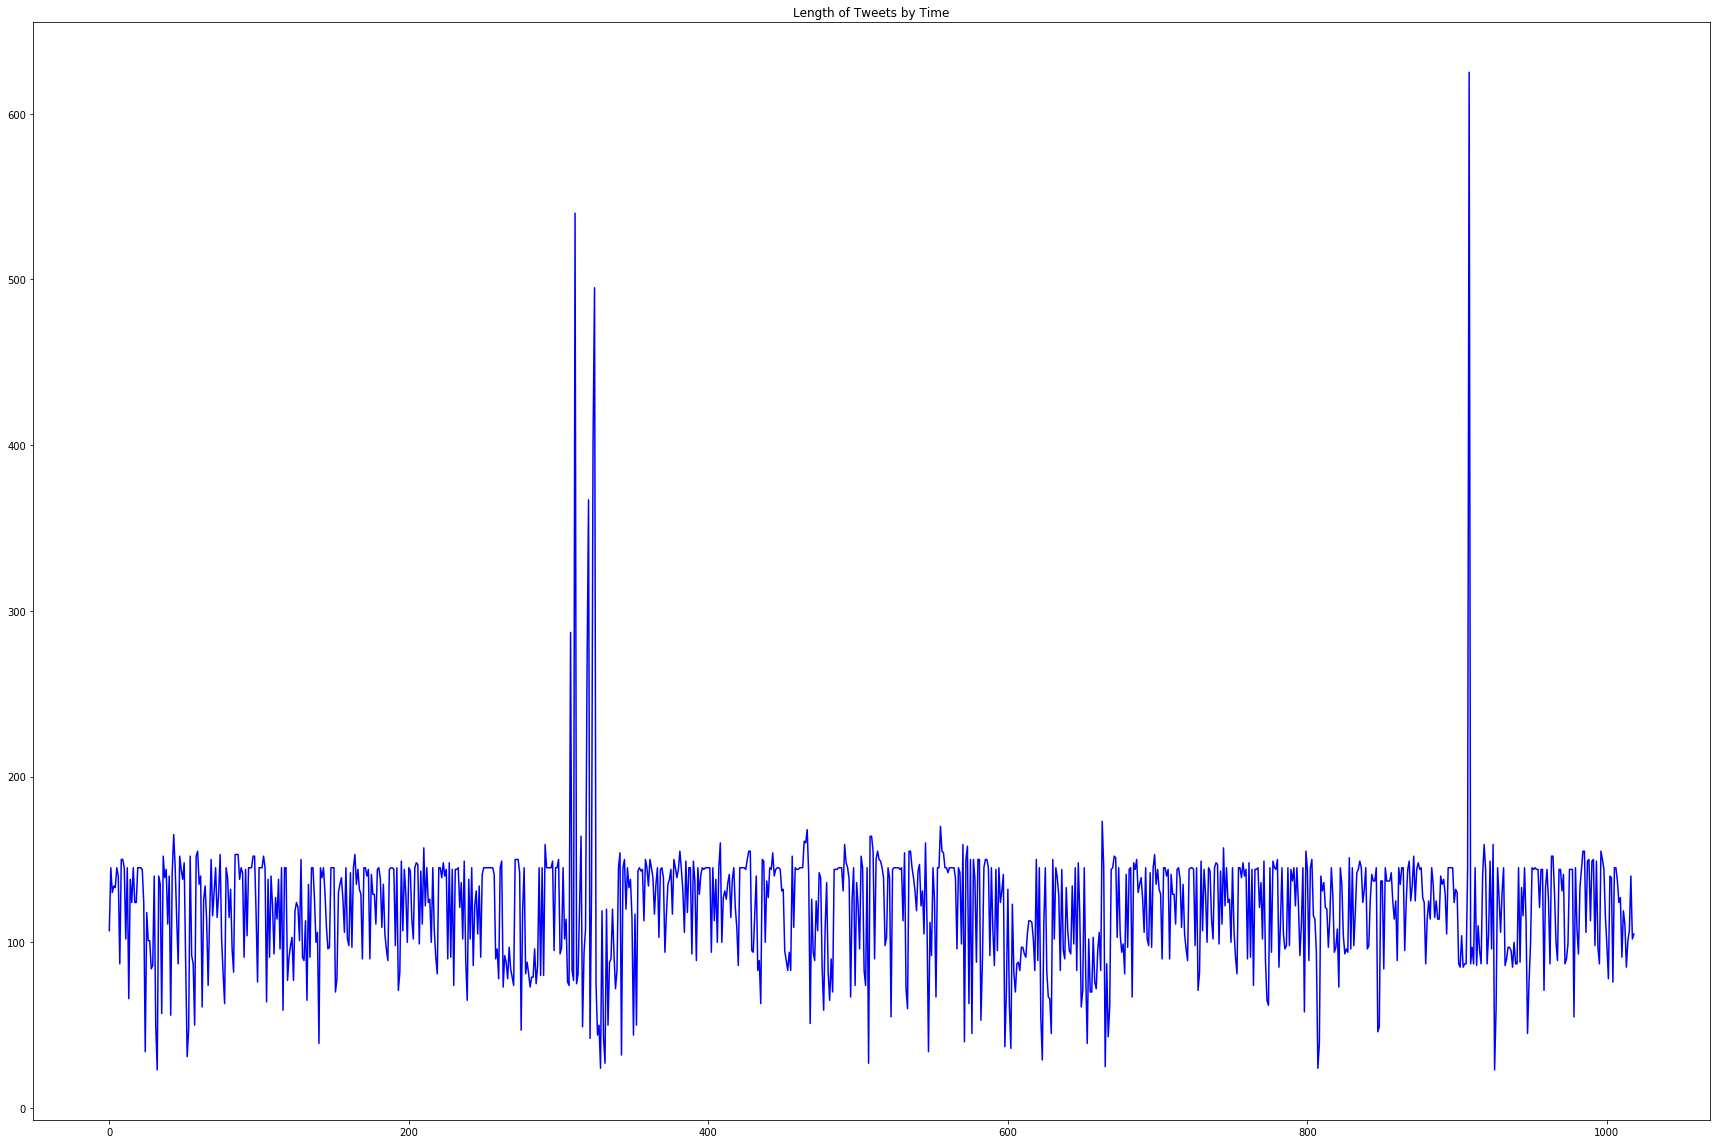

In [7]:
tw_len_s = pd.Series(tw_len)
tw_len_s.plot(figsize=(24,16), color='b', title="Length of Tweets by Time")
plt.show()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


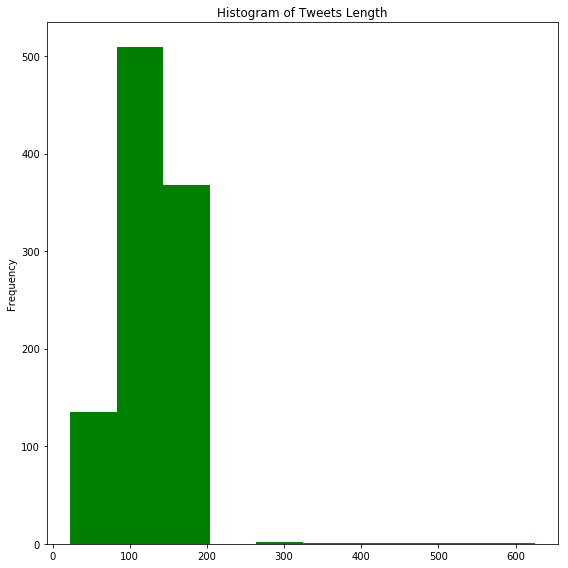

In [8]:
tw_len_s.plot.hist(figsize=(8,8), color='g', title="Histogram of Tweets Length")

count    1019.000000
mean      121.377821
std        40.972648
min        23.000000
25%        96.000000
50%       131.000000
75%       145.000000
max       625.000000
Name: tweet, dtype: float64


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


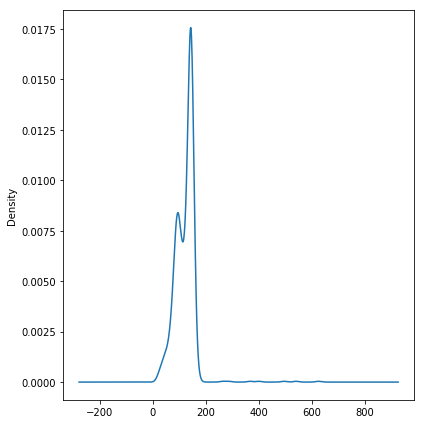

In [9]:
tw_len.plot.density(figsize=(6,6))
print(tw_len.describe())

In [10]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

In [11]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [12]:
unique_name = df2.name.unique()
unique_name = unique_name.tolist()

In [13]:
stop_words = {'drinking','by','at','for','our','the','rt','to','of','and','in','austin','brewing','what',
    'with','http','brewer','brewery','see','https','now','available','or','it','co','beer','is','you','my',
    'is','thi','an','this','on','your','get','that','we','denver','from','just','sa','san','diego','are',
    '@','#','drinking','amp','https','co','rt','new','breckbrew','greatdividebrew','10barrelbrewing',
    'denverbeerco','hogsheadbrewery','cerebralbrewing','indybrewing','blueowlbrewing','512brewing','cascadebrewing',
    'offcolorbrewing','begylebrewing','pipeworksbrewin','chicago','portland','seattle','pikebrewing','stoupbrewing',
    'elysianbrewing','bjsrestaurants','halfdoorbrewing','alesmithbrewing'}


In [14]:
unique_name.extend(stop_words)

In [15]:
df.tweet.describe()

count                                                  1019
unique                                                  829
top       RT @pikebrewing: August 17 is the 111 Annivers...
freq                                                     10
Name: tweet, dtype: object

In [16]:
unique_tweet = df.tweet.unique()
unique_tweet.tolist()
unique_df = pd.DataFrame(unique_tweet)
unique_df.columns = ["unique_tweets"]
print(unique_df.head())

                                       unique_tweets
0  RT @flyingbikecoop: 3rd Anniversary Party toda...
1  Mystery keg #1 is tapped! Pitchfork is our wil...
2  3 years old!! #proudmemberowner - Drinking a S...
3  #MemberDrivenBeer celebrating 3 years! - Drink...
4  #MemberDrivenBeer Stout Float :-D - Drinking a...


In [17]:
unique_str = unique_df.to_string()
unique_str2 = unique_str.lower()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


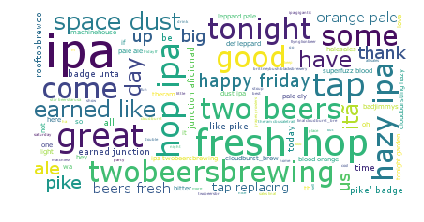

In [18]:
#create a wordclouds for string objects
dfbrew_wc2 = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                       background_color='white',
                       max_font_size=50,
                       max_words=100,
                       relative_scaling = .50,
                      stopwords = unique_name
                      ).generate(unique_str2)
plt.imshow(dfbrew_wc2)
plt.axis("off")
plt.show()

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

In [20]:
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '#', 'rt', 'amp',
             'http', 'https', '/', '://', '_', 'co', 'drinking', 'beer', 'â', 'ã', 'gt', 'denver', 'colorado',
            'brewery', 'texas', 'chicago', 'portland', 'austin', 'seattle', 'beers', 'san', 'diego'])


In [21]:
series_tweets = unique_df['unique_tweets']
tweet_str = series_tweets.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(tweet_str) if i.lower() not in stop and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('ipa', 177), ('replacing', 93), ('pikebrewing', 90), ('elysianbrewing', 87), ('twobeersbrewing', 65), ('stoupbrewing', 64), ('tap', 58), ('pale', 52), ('hop', 52), ('fresh', 41), ('tonight', 38), ('ale', 37), ('badge', 35), ('new', 33), ('hazy', 32), ('great', 30), ('like', 29), ('theram', 29), ('space', 28), ('us', 27), ('good', 27), ('ontapsea', 27), ('optimismbrewing', 27), ('two', 26), ('come', 24), ('get', 24), ('ãªâ', 24), ('earned', 24), ('untappd', 24), ('friday', 23), ('stoup', 23), ('day', 23), ('time', 23), ('pike', 23), ('thebeerjunction', 22), ('machinehouse', 20), ('garden', 20), ('dust', 20), ('big', 19), ('cloudburst', 19), ('anniversary', 18), ('happy', 18), ('brewing', 18), ('badjimmys', 18), ('rooftopbrewco', 18), ('flyingbikecoop', 17), ('golden', 17), ('orange', 17), ('itã', 17), ('week', 16)]


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


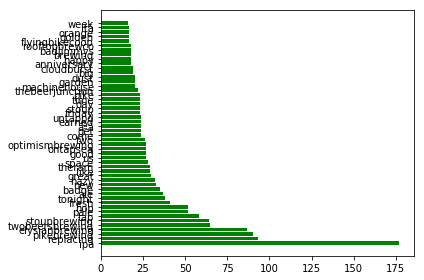

In [22]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center', color='green')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

In [23]:
df.source.describe()

count        1019
unique         41
top       Untappd
freq          260
Name: source, dtype: object

In [24]:
df[200:300]

,name,time,tweet,geo,id,source
200,1029459593196462080,2018-08-14 20:07:48,@twobeersbrewing stopped by today with a RAD s...,NaN,1029459593196462080,Instagram
201,1029446739911032832,2018-08-14 19:16:43,Join @REI at The Woods this Thursday for a nig...,NaN,1029446739911032832,Twitter Web Client
202,1029220992231518208,2018-08-14 04:19:41,Stoup Global Superstar IPA @stoupbrewing now o...,NaN,1029220992231518208,Watershed Beer List Update
203,1029153618786705411,2018-08-13 23:51:58,Two Beers Fresh Hop IPA (@twobeersbrewing) i...,NaN,1029153618786705411,DPBeerDashboard
204,1029120719580422144,2018-08-13 21:41:14,Tonight at Star Brass Lounge: Fresh Hop Happy ...,NaN,1029120719580422144,Twitter Web Client
205,1028997765534109696,2018-08-13 13:32:39,RT @DowntownSpirits: Drop by to pick up the Ra...,NaN,1028997765534109696,Twitter for iPhone
206,1028868834923622400,2018-08-13 05:00:20,Drop by to pick up the Rad Hazy RosÃÂ© IPA fr...,NaN,1028868834923622400,Hootsuite Inc.
207,1028854916801024001,2018-08-13 04:05:02,Drinking The Other Coast Hazy IPA by @twobeer...,NaN,1028854916801024001,Untappd
208,1028523367987601408,2018-08-12 06:07:34,"Some Saturdays, one needs Two. #twobeers .\n#t...",NaN,1028523367987601408,IFTTT
209,1028433153806032897,2018-08-12 00:09:05,Oh how I love fresh hop season. - Drinking a F...,NaN,1028433153806032897,Untappd


In [25]:
df.tweet[270:271]

270    Fremont Summer Ale now on tap (Replacing Snoqu...
Name: tweet, dtype: object

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


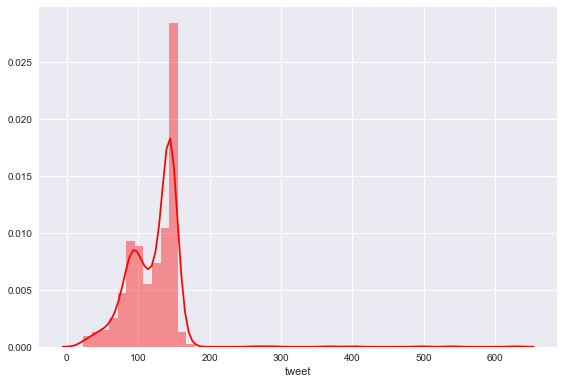

In [27]:
sns.distplot(tw_len_s, color="r")